## PoS probabilities
Goal of this notebook : 
We want to know for each part of speech was is the distribution of the next part of speech, based on our lyrics dataset.

Steps:
1. Import Dataset
2. Compute the consecutive part of speech
3. Count number of distinct part of speech
4. Count how many times each appears
5. Create a dict per part of speech
6. Count the number of following PoS by going through all dataset
7. Divide by the total number of events to have probabilities
8. Visualise the probabilities

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
#1
filepath = "lyrics_final_clean.csv"
lyrics_df = pd.read_csv(filepath)
lyrics_df = lyrics_df.dropna(axis = 0, how='any', subset=['lyrics'])
lyrics_df.head()

,artist,genre,lyrics,song,year
0,beyonce-knowles,pop,oh baby how you doing\nyou know i m gonna cut ...,ego-remix,2009.0
1,beyonce-knowles,pop,playin everything so easy\nit s like you seem...,then-tell-me,2009.0
2,beyonce-knowles,pop,if you search\nfor tenderness\nit isn t hard t...,honesty,2009.0
3,beyonce-knowles,pop,oh oh oh i oh oh oh i\n\nif i wrote a book abo...,you-are-my-rock,2009.0
4,beyonce-knowles,pop,party the people the people the party it s pop...,black-culture,2009.0


In [6]:
#2
import spacy
en_nlp = spacy.load('en')

ADJ: adjective ADP: adposition ADV: adverb AUX: auxiliary verb CONJ: coordinating conjunction DET: determiner INTJ: interjection NOUN: noun NUM: numeral PART: particle PRON: pronoun PROPN: proper noun PUNCT: punctuation SCONJ: subordinating conjunction SYM: symbol VERB: verb X: other

In [11]:
def generate_pos_for_lyrics(l):
    doc = en_nlp(l)
    pos = []
    for i in range(len(doc)):
        #print(doc[i], doc[i].pos_)
        type_ = doc[i].pos_
        if type_ != 'SPACE':
            pos.append(type_)
    return pos

In [77]:
length

316899

In [80]:
pos = []
length = len(lyrics_df)
for i, r in lyrics_df.iterrows():
    if i % 25000 == 0:
        print("I'm at row ", i)
    l = r['lyrics'].replace('\n', ' ')
    pos.append(generate_pos_for_lyrics(l))

I'm at row  0
I'm at row  25000
I'm at row  50000
I'm at row  75000
I'm at row  100000
I'm at row  125000
I'm at row  150000
I'm at row  175000
I'm at row  200000
I'm at row  225000
I'm at row  250000
I'm at row  275000
I'm at row  300000


In [81]:
len(pos)

316899

In [82]:
pickle.dump(pos,open( "PoS-computed.p", "wb" ))

In [68]:
pos = pickle.load( open( "PoS-computed.p", "rb" ) )

In [83]:
# 3
set_pos = set()
for i in range(len(pos)):
    temp_set = set(pos[i])
    set_pos = set_pos.union(temp_set)

print("There are : ", len(set_pos), " different part of speech")
print("Here is the list : ", set_pos)

There are :  15  different part of speech
Here is the list :  {'ADV', 'ADJ', 'CCONJ', 'NUM', 'VERB', 'PUNCT', 'INTJ', 'X', 'NOUN', 'DET', 'PRON', 'PART', 'ADP', 'PROPN', 'SYM'}


In [84]:
def initiate_pos_dict():
    dict_ = {}
    for pos in set_pos:
        dict_[pos] = 0
    return dict_

In [85]:
#4 
total_count = initiate_pos_dict()
    
for i in range(len(pos)):
    for j in range(len(pos[i])):
        total_count[pos[i][j]] += 1

In [86]:
total_count

{'ADJ': 6751870,
 'ADP': 6813803,
 'ADV': 5668695,
 'CCONJ': 2243434,
 'DET': 6202424,
 'INTJ': 994258,
 'NOUN': 15863772,
 'NUM': 444858,
 'PART': 2291458,
 'PRON': 10663731,
 'PROPN': 103490,
 'PUNCT': 105093,
 'SYM': 2166,
 'VERB': 18741078,
 'X': 318360}

In [87]:
#5
pos2idx = {}
idx2pos = {}
pos_counts = []
for i, p in enumerate(set_pos):
    pos2idx[p] = i
    idx2pos[i] = p
    pos_counts.append(initiate_pos_dict())
    
assert(len(pos_counts) == len(set_pos))

In [88]:
#6
for i in range(len(pos)):
    for j in range(len(pos[i]) - 1):
        curr_pos = pos[i][j]
        next_pos = pos[i][j+1]
        pos_counts[pos2idx[curr_pos]][next_pos] += 1

In [89]:
#7 
def divide_dict_per_value(d, value):
    d_total = 0
    for k, v in d.items():
        d[k] = v/value
        d_total += d[k]
    print(d_total, " close to 1 ?")
    return d

In [90]:
for i, d in enumerate(pos_counts):
    pos_counts[i] = divide_dict_per_value(d, total_count[idx2pos[i]])

0.9944212909673213  close to 1 ?
0.9960409486557059  close to 1 ?
0.9999224403303152  close to 1 ?
0.9929752864959156  close to 1 ?
0.9974558027024915  close to 1 ?
0.9944525325188167  close to 1 ?
0.9902972870220808  close to 1 ?
0.9949616786028397  close to 1 ?
0.9912144476105682  close to 1 ?
0.9995003566347608  close to 1 ?
0.9965484875790659  close to 1 ?
0.9965140098574793  close to 1 ?
0.9988433771859855  close to 1 ?
0.9953715334814957  close to 1 ?
0.9981532779316711  close to 1 ?


In [91]:
#8
total_nb_pos = 0
for k,v in total_count.items():
    total_nb_pos += v
    
prob_pos = divide_dict_per_value(total_count, total_nb_pos)

0.9999999999999998  close to 1 ?


In [92]:
def visualize_prob_dict(d, t):
    k = d.keys()
    x = range(0, len(k))
    y = d.values()
    fig = plt.figure(figsize = (15, 10))
    plt.scatter(x, y)
    plt.ylim((0,1))
    plt.xticks(x, k)
    plt.title(t)
    plt.show()

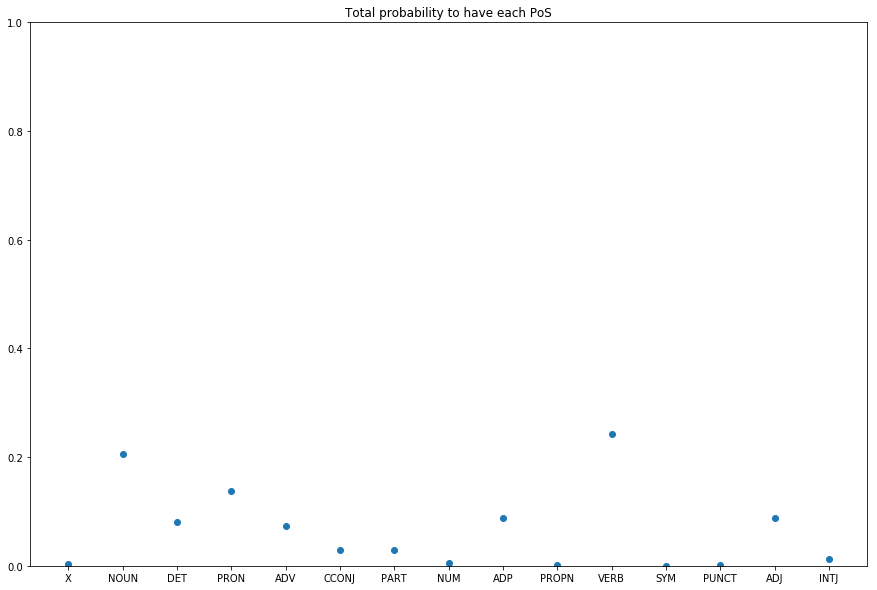

In [93]:
visualize_prob_dict(prob_pos, "Total probability to have each PoS")

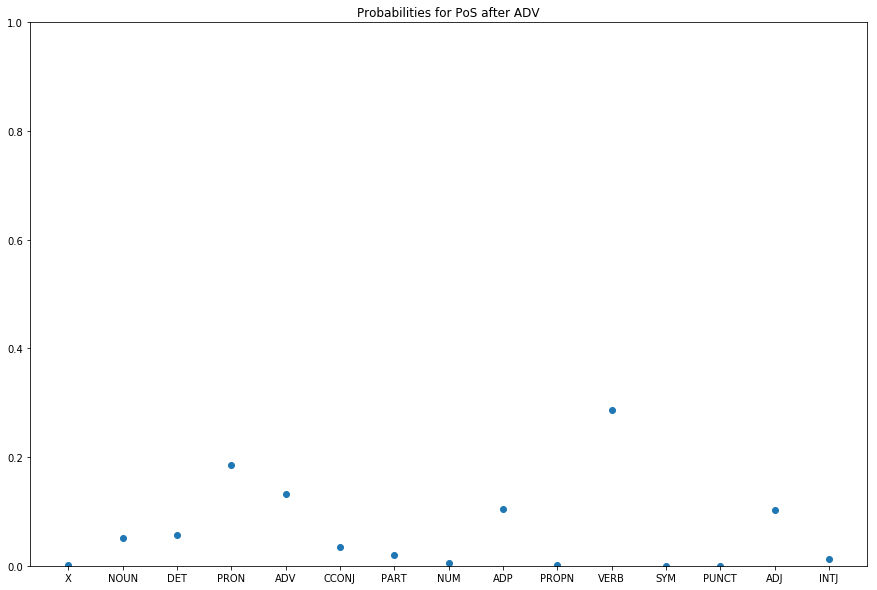

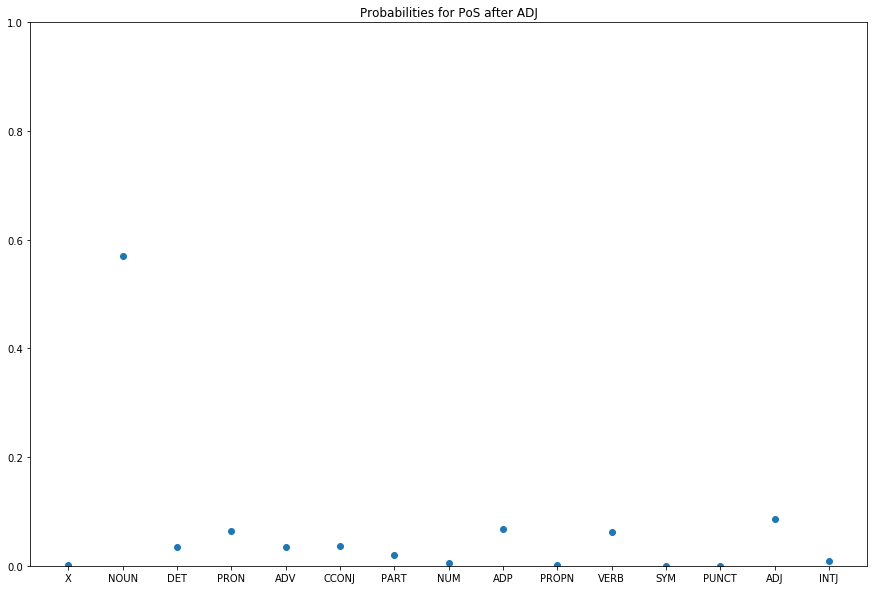

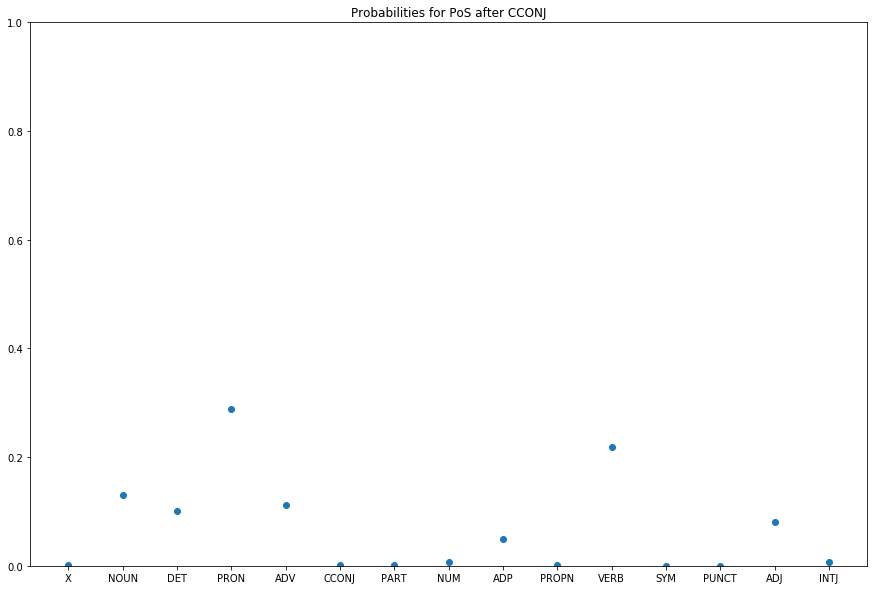

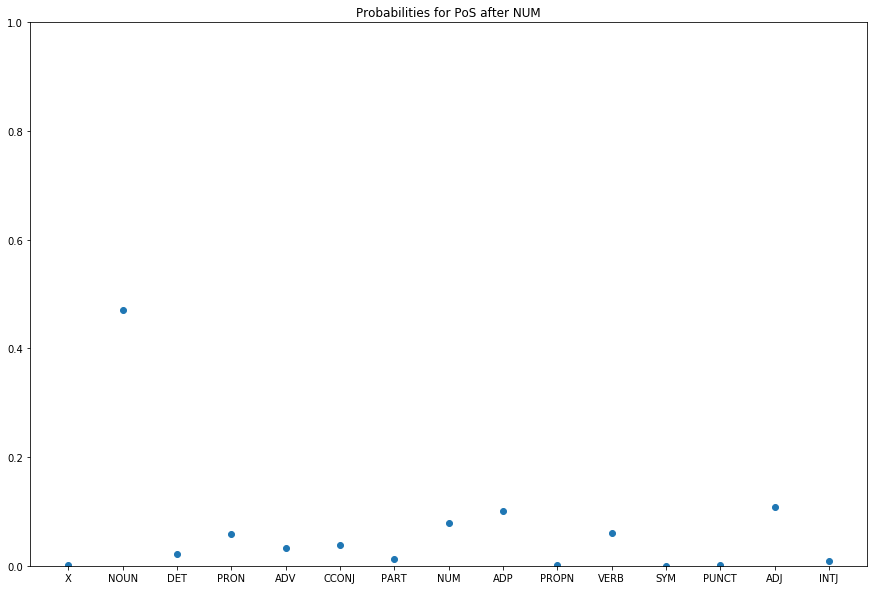

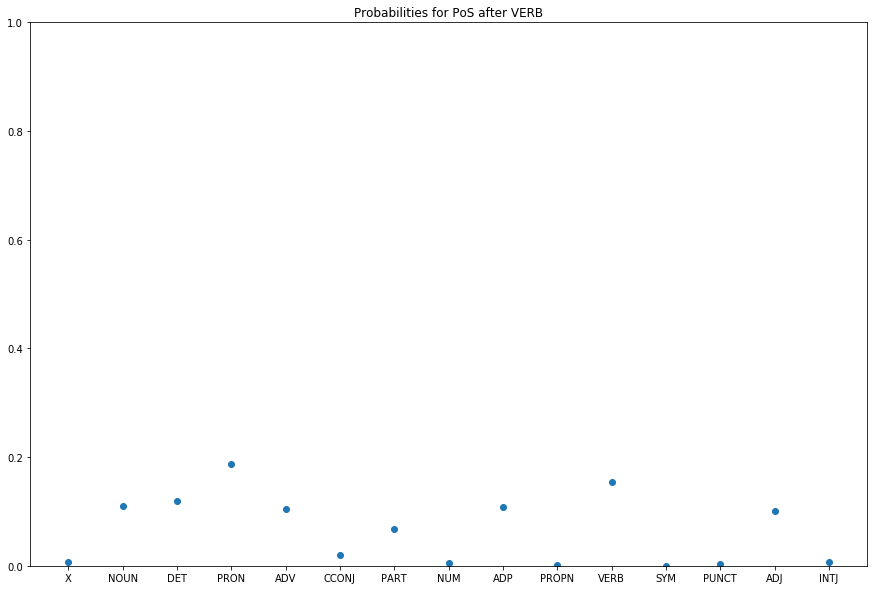

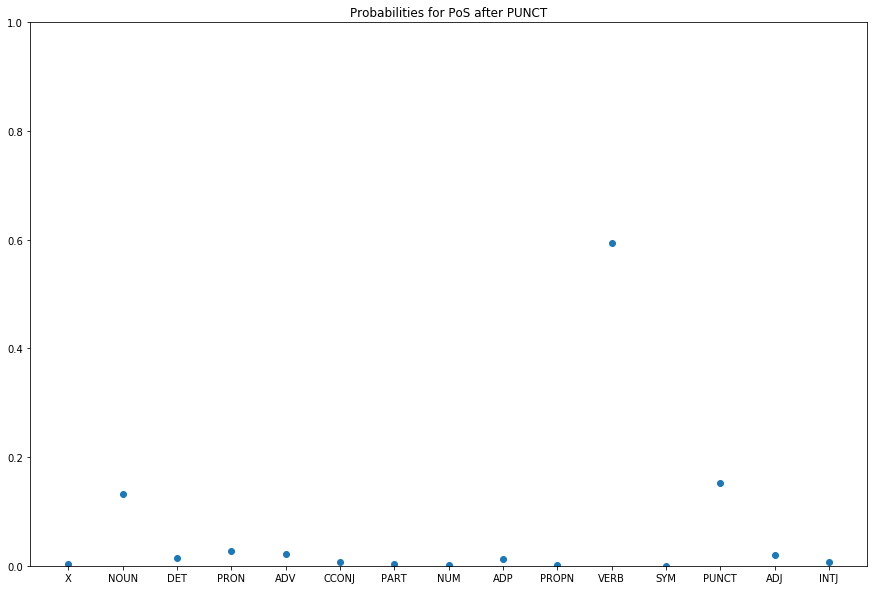

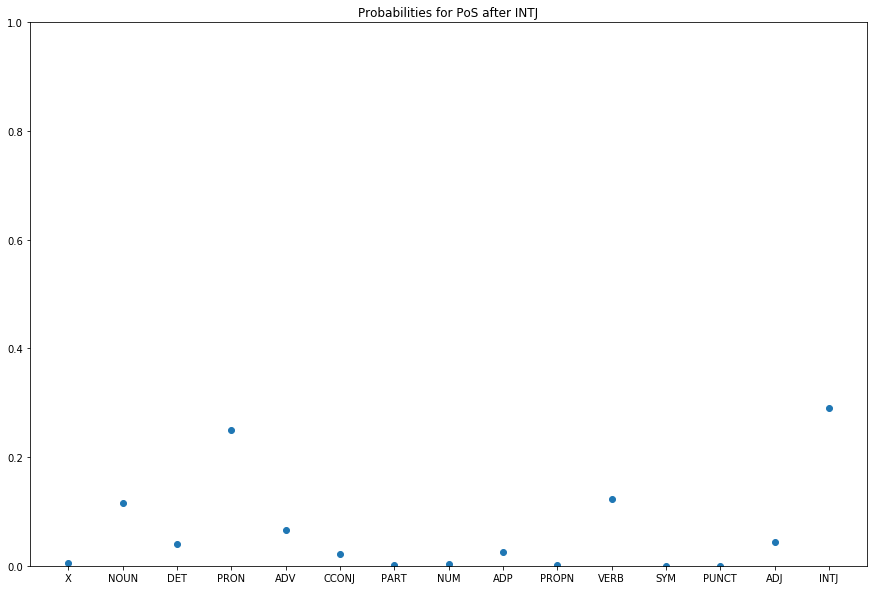

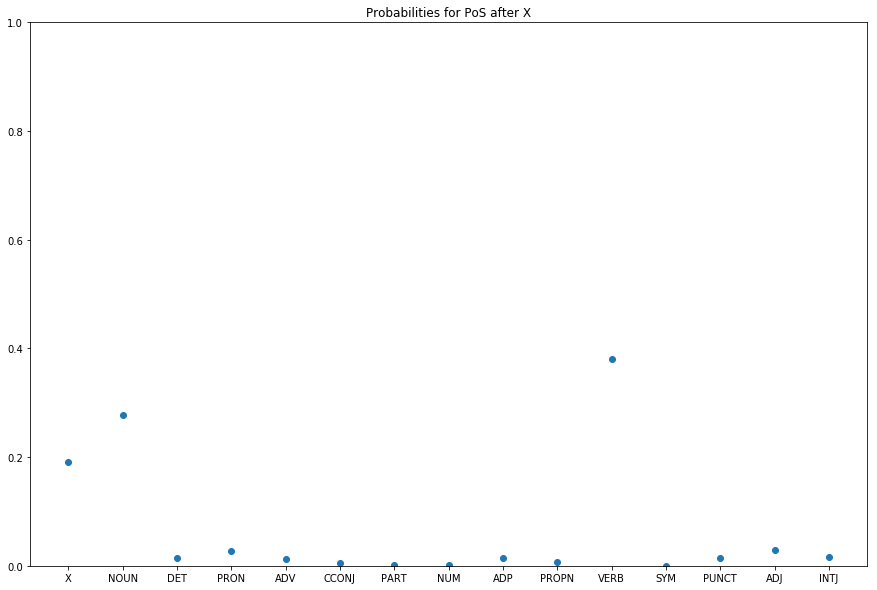

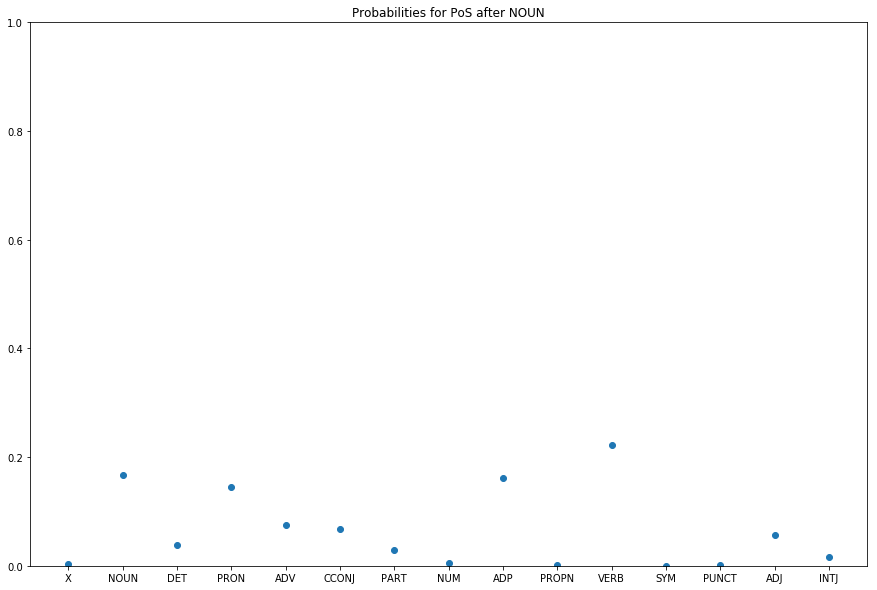

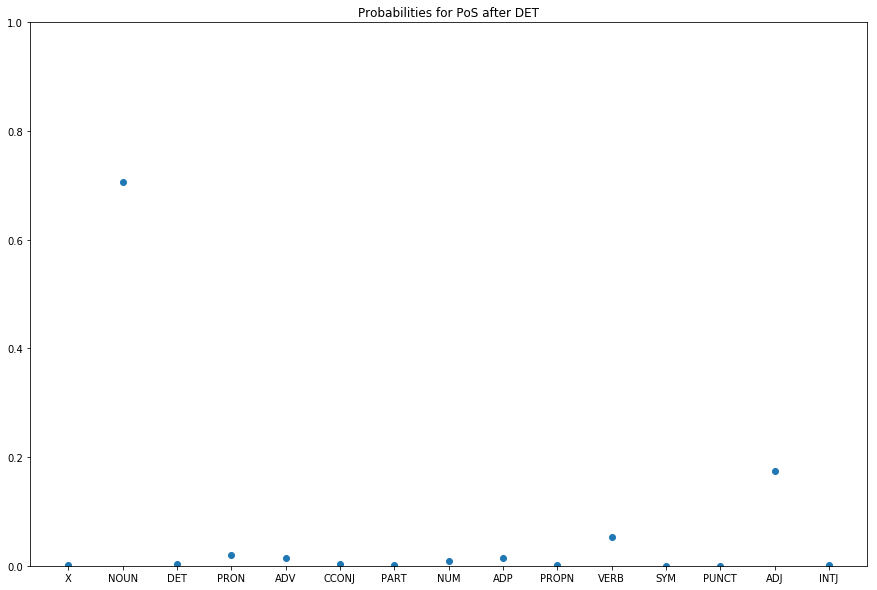

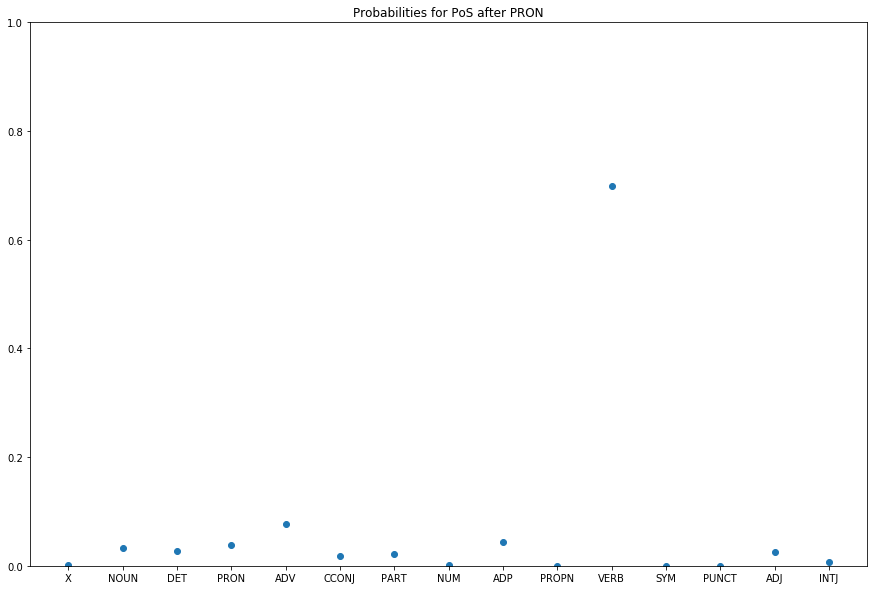

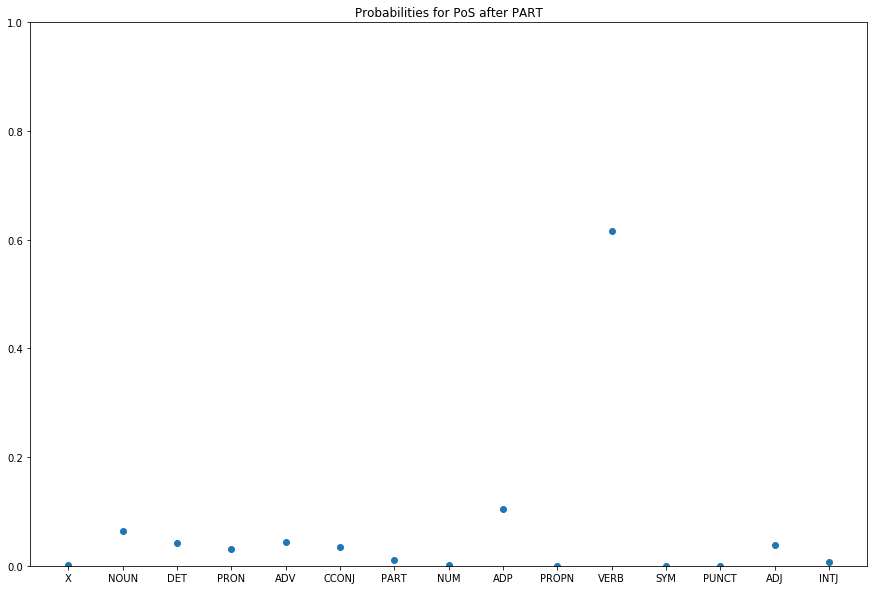

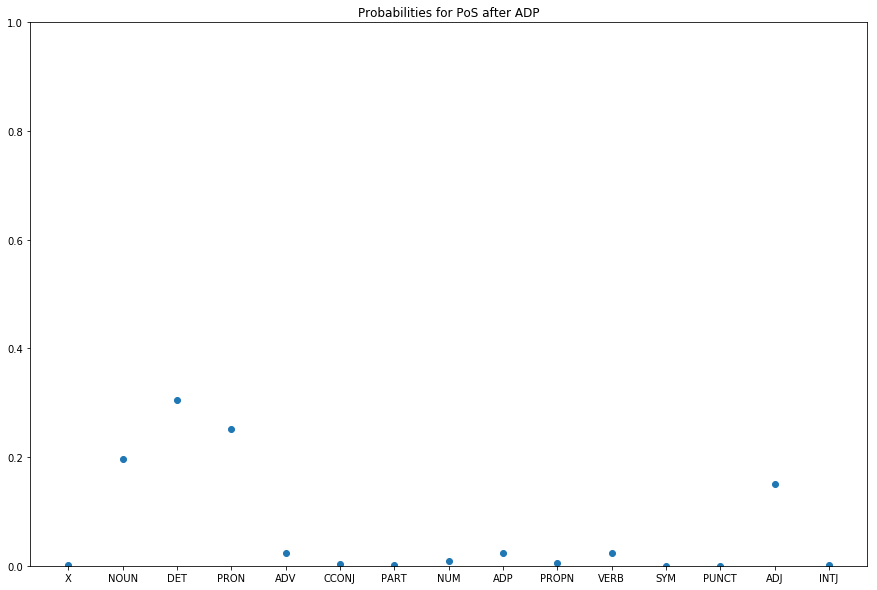

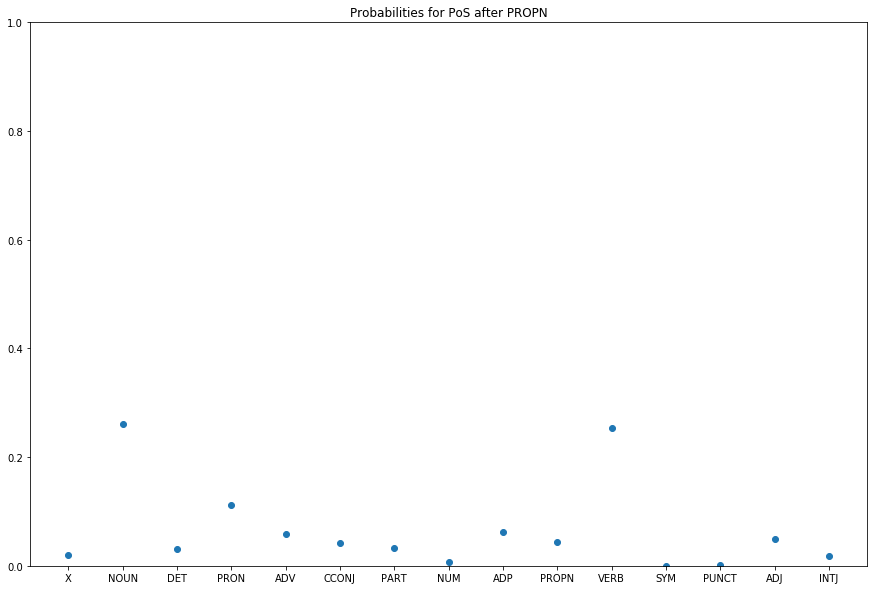

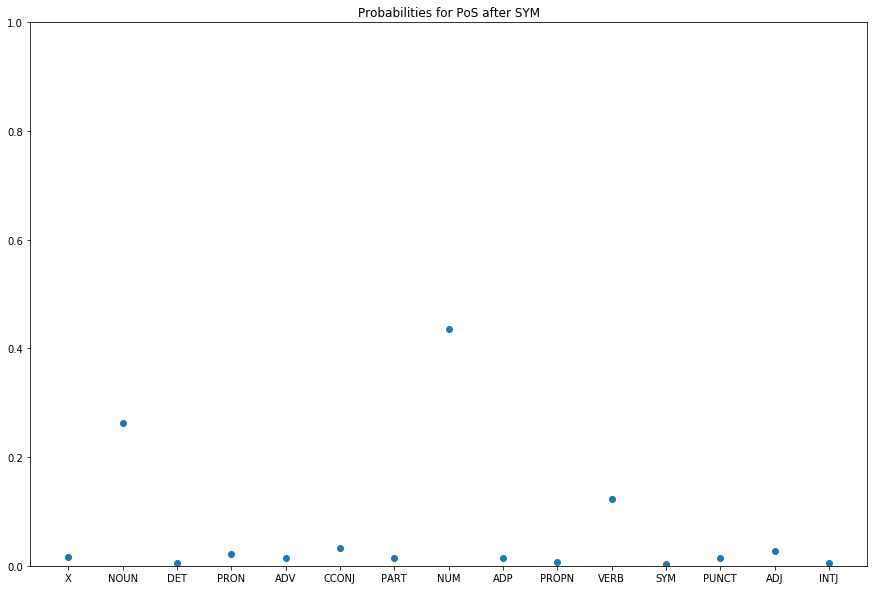

In [94]:
for pos in set_pos:
    d = pos_counts[pos2idx[pos]]
    t = "Probabilities for PoS after " + pos
    visualize_prob_dict(d, t)

In [99]:
test = pos_counts[0]
list(test.keys())

['X',
 'NOUN',
 'DET',
 'PRON',
 'ADV',
 'CCONJ',
 'PART',
 'NUM',
 'ADP',
 'PROPN',
 'VERB',
 'SYM',
 'PUNCT',
 'ADJ',
 'INTJ']

In [106]:
for i in range(15):
    prob = pos_counts[i]
    to_fill = 1 - sum(prob.values())
    max_prob = max(prob, key=prob.get)
    prob[max_prob] += to_fill
    print(sum(prob.values()))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0


In [121]:
pickle.dump(pos_counts ,open( "pos_counts.p", "wb" ))

In [96]:
pickle.dump(pos2idx, open( "pos2idx.p", "wb" ))

In [ ]:
pos_counts = pickle.load( open( "pos_counts.p", "rb" ) )
pos2idx = pickle.load( open("pos2idx.p", "rb"))

In [100]:
def predict_next_pos(curr_pos):
    prob = pos_counts[pos2idx[curr_pos]]
    return np.random.choice(list(prob.keys()), p=list(prob.values()))

In [127]:
predict_next_pos('VERB')

'DET'